# Title Lab | Customer Analysis Final Round
***
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

**01) - Problem (case study)**

  *Data Description.*

  *Goal.*

**02) - Getting Data**

  *Read the .csv file.*

**03) - Cleaning/Wrangling/EDA**

  *Change headers names.*

  *Deal with NaN values.*

  *Categorical Features.*

  *Numerical Features.*

  *Exploration.*

**04) - Processing Data**

  *Dealing with outliers.*

  *Normalization.*

  *Encoding Categorical Data.*

  *Splitting into train set and test set.*

**05) - Modeling**

  *Apply model.*

**06) - Model Validation**

  *R2.*

  *MSE.*

  *RMSE.*

  *MAE.*

**07) - Reporting**

  *Present results.*

GOAL best fitting linear regression model on a data set 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


 ## Step 1) Read the .csv file.

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#indexing customer column (we do not want to lose the customers as they are uniques values)

In [4]:
data = data.set_index("Customer")


## Step 2) Change headers names ('EmployementStatus' obvious typo)

In [5]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename

data.columns #keep in mind that you can also use the 'replace' when you have a high number of columns key (old column)= value (new columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.shape

(9134, 23)

In [7]:
data = data.rename(columns={'EmploymentStatus':'Employment_Status','Customer Lifetime Value':'Customer_Lifetime_Value', 'Effective To Date':'Effective_To_Date', 'Location Code':'Location_Code','Marital Status':'Marital_Status', 'Monthly Premium Auto':'Monthly_Premium_Auto','Months Since Last Claim':'Months_Since_Last_Claim','Months Since Policy Inception':'Months_Since_Policy_Inception','Number of Open Complaints':'Number_of_Open_Complaints', 'Number of Policies':'Number_of_Policies', 'Renew Offer Type':'Renew_Offer_Type','Sales Channel':'Sales_Channel', 'Total Claim Amount':'Total_Claim_Amount', 'Vehicle Class':'Vehicle_Class', 'Vehicle Size':'Vehicle_Size' })
data.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'Employment_Status', 'Gender', 'Income',
       'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [8]:
data.head()

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer_Lifetime_Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective_To_Date              9134 non-null   object 
 6   Employment_Status              9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location_Code                  9134 non-null   object 
 10  Marital_Status                 9134 non-null   object 
 11  Monthly_Premium_Auto           9134 non-null   int64  
 12  Months_Since_Last_Claim        9134 non-null

  ## Step 3) Deal with NaN values.


In [10]:
data.isna().sum()

State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
Employment_Status                0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [11]:
#exploration on 0 values 

data.isin([0]).sum()

State                               0
Customer_Lifetime_Value             0
Response                            0
Coverage                            0
Education                           0
Effective_To_Date                   0
Employment_Status                   0
Gender                              0
Income                           2317
Location_Code                       0
Marital_Status                      0
Monthly_Premium_Auto                0
Months_Since_Last_Claim           314
Months_Since_Policy_Inception      83
Number_of_Open_Complaints        7252
Number_of_Policies                  0
Policy Type                         0
Policy                              0
Renew_Offer_Type                    0
Sales_Channel                       0
Total_Claim_Amount                  0
Vehicle_Class                       0
Vehicle_Size                        0
dtype: int64

## Step 4-5) Categorical Features and Numerical Features


In [12]:
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)
#define data type 

## Step 6) Exploration

In [13]:
#exploration
data.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
data = data.drop_duplicates()
data.shape
#check for duplicates

(8971, 23)

In [15]:
num_T=data.describe().T
num_T.head()
#describe only numerical values based on T.

,count,mean,std,min,25%,50%,75%,max
Customer_Lifetime_Value,8971.0,8004.192319,6867.941039,1898.007675,3999.4977,5792.439588,8954.637109,83325.38119
Income,8971.0,37644.828113,30431.741597,0.000000,0.0000,33947.000000,62365.500000,99981.00000
Monthly_Premium_Auto,8971.0,93.192621,34.358960,61.000000,68.0000,83.000000,109.000000,298.00000
Months_Since_Last_Claim,8971.0,15.099209,10.077668,0.000000,6.0000,14.000000,23.000000,35.00000
Months_Since_Policy_Inception,8971.0,48.054175,27.916442,0.000000,24.0000,48.000000,71.000000,99.00000


  ## Normalization.(Preparation for the operation, Correlation Matrix exploration).



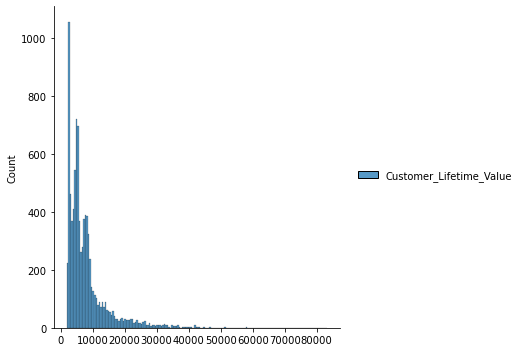

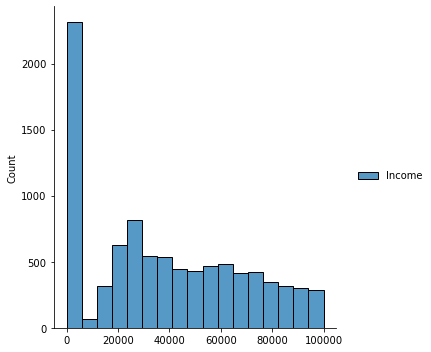

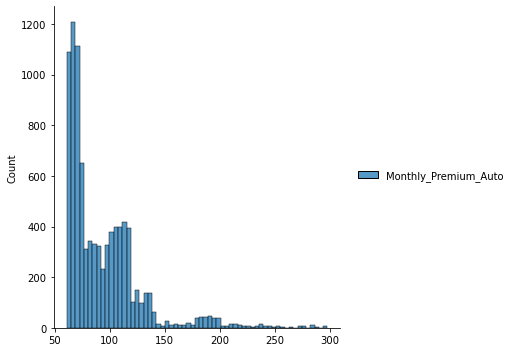

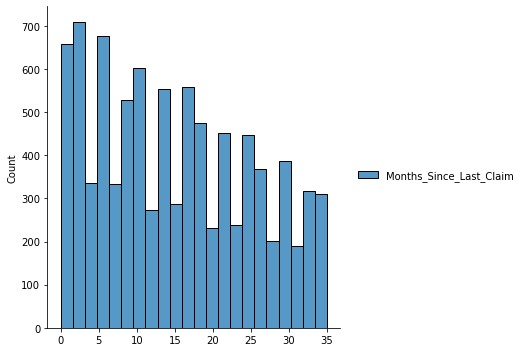

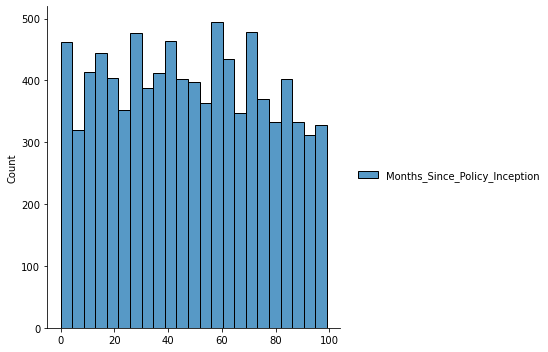

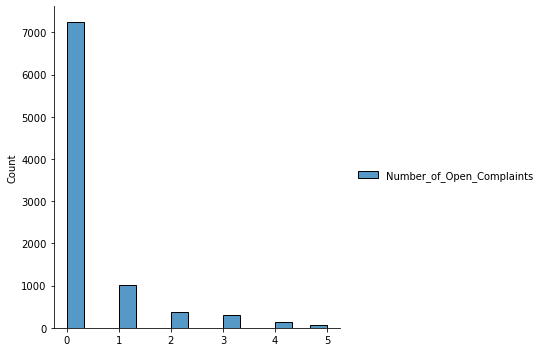

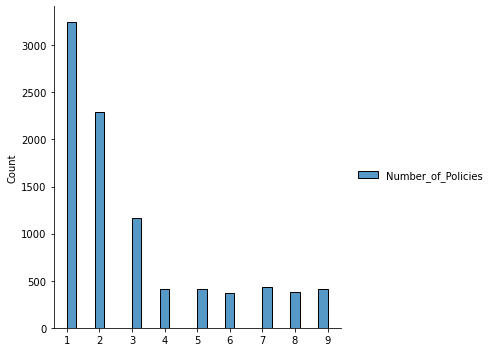

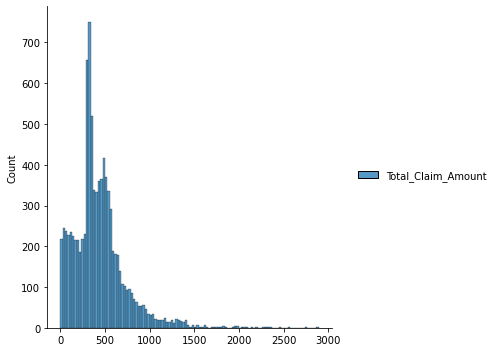

In [16]:
num_col= list(num.columns)
for i in num_col:
    sns.displot([num[i]])

In [17]:
#correlation

In [18]:

import matplotlib.pyplot as plt
%matplotlib inline


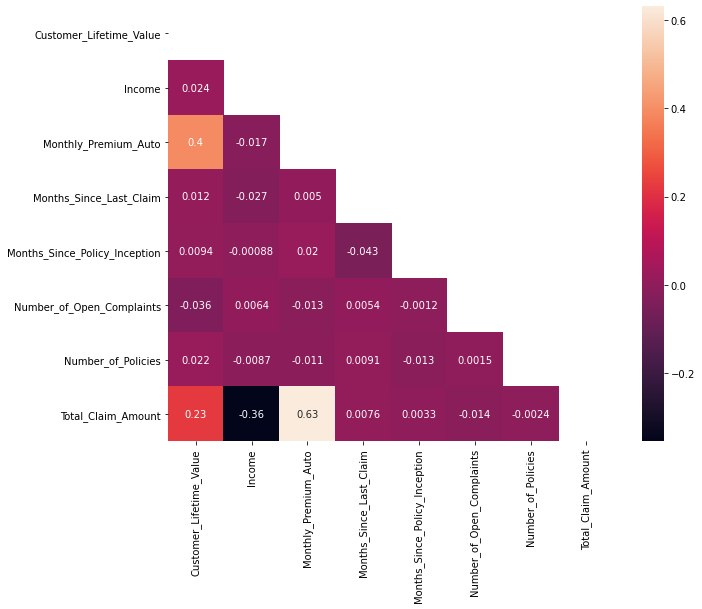

In [19]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


In [20]:
#drop customer lifetime value and Income, on the second model we can test the Income back

In [21]:
num_drop1= num.drop(['Customer_Lifetime_Value'], axis=1)

In [22]:
num_drop2= num_drop1.drop(['Income'], axis=1)

dummyfy educational and drop it 

dictionary replace vehicole size small 1 medium 2 big 3

boxplot

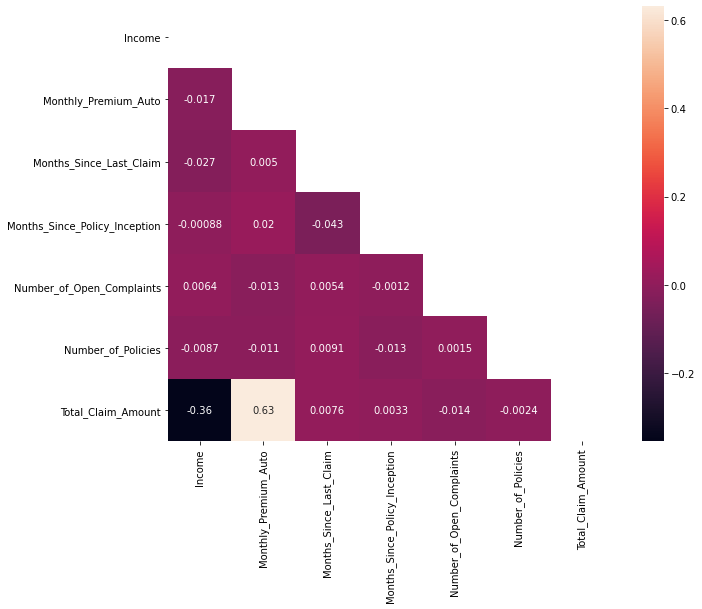

In [23]:
correlations_matrix = num_drop1.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

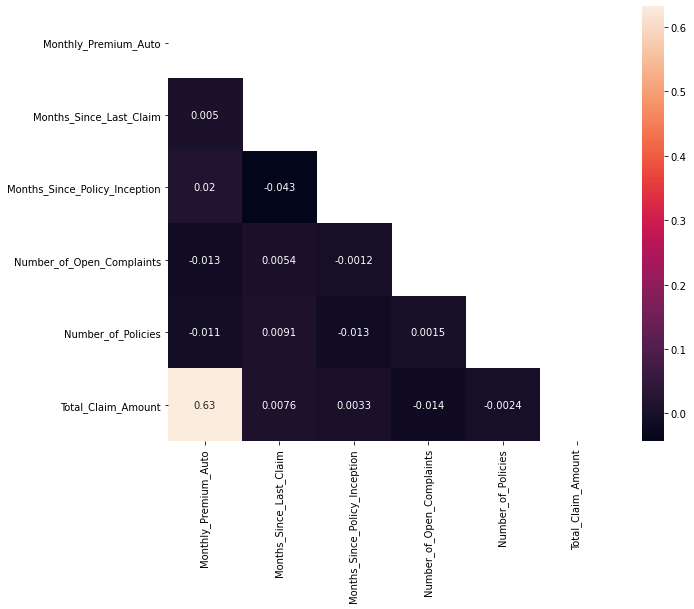

In [24]:
correlations_matrix = num_drop2.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [25]:
#Handle date difference

data['Effective_To_Date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [26]:
cat.drop(['Effective_To_Date'], axis=1)

,State,Response,Coverage,Education,Employment_Status,Gender,Location_Code,Marital_Status,Policy Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [27]:
def boxplot_ordinals(ordinal, target):
    df = pd.DataFrame(data= [cat[ordinal], data[target]])
    df = df.T
    sns.boxplot(x=ordinal, y=target, data=df)
    plt.show()
    return plt.show()


In [28]:
ordi=pd.DataFrame(columns=["Coverage","Education", "Employment_Status", "Vehicle_Class", "Vehicle_Size"],data=cat)
ordi.head()



,Coverage,Education,Employment_Status,Vehicle_Class,Vehicle_Size
Customer,,,,,
BU79786,Basic,Bachelor,Employed,Two-Door Car,Medsize
QZ44356,Extended,Bachelor,Unemployed,Four-Door Car,Medsize
AI49188,Premium,Bachelor,Employed,Two-Door Car,Medsize
WW63253,Basic,Bachelor,Unemployed,SUV,Medsize
HB64268,Basic,Bachelor,Employed,Four-Door Car,Medsize


## Dealing with outliers.

In [29]:
#for i in list(ordi.columns):
#    print(i)
#    boxplot_ordinals(i,'Total Claim Amount')

In [30]:
#coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
#ordi['Coverage'] = ordi['Coverage'].map(coverage_dict)
#education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
#ordi['Education'] = ordi['Education'].map(education_dict)
#vehicle_class_dict = {'Two-Door Car':0, 'Four-Door Car':0, 'SUV':1, 'Luxury SUV':2, 'Sports Car':1,'Luxury Car':2}
#ordi['Vehicle_Class'] = ordi['Vehicle Class'].map(vehicle_class_dict)
#vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
#ordi['Vehicle_Size'] = ordi['Vehicle Size'].map(vehicle_dict)

In [31]:
ordi.drop("Employment_Status",axis=1,inplace=True)
ordi.head()

,Coverage,Education,Vehicle_Class,Vehicle_Size
Customer,,,,
BU79786,Basic,Bachelor,Two-Door Car,Medsize
QZ44356,Extended,Bachelor,Four-Door Car,Medsize
AI49188,Premium,Bachelor,Two-Door Car,Medsize
WW63253,Basic,Bachelor,SUV,Medsize
HB64268,Basic,Bachelor,Four-Door Car,Medsize


In [32]:
ordi.columns

Index(['Coverage', 'Education', 'Vehicle_Class', 'Vehicle_Size'], dtype='object')

In [33]:
cat.drop(list(ordi.columns),axis=1,inplace=True)


In [34]:
num=pd.concat([num, ordi],axis=1)
num.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Coverage,Education,Vehicle_Class,Vehicle_Size
Customer,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,Basic,Bachelor,Two-Door Car,Medsize
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,Extended,Bachelor,Four-Door Car,Medsize
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,Premium,Bachelor,Two-Door Car,Medsize
WW63253,7645.861827,0,106,18,65,0,7,529.881344,Basic,Bachelor,SUV,Medsize
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,Basic,Bachelor,Four-Door Car,Medsize


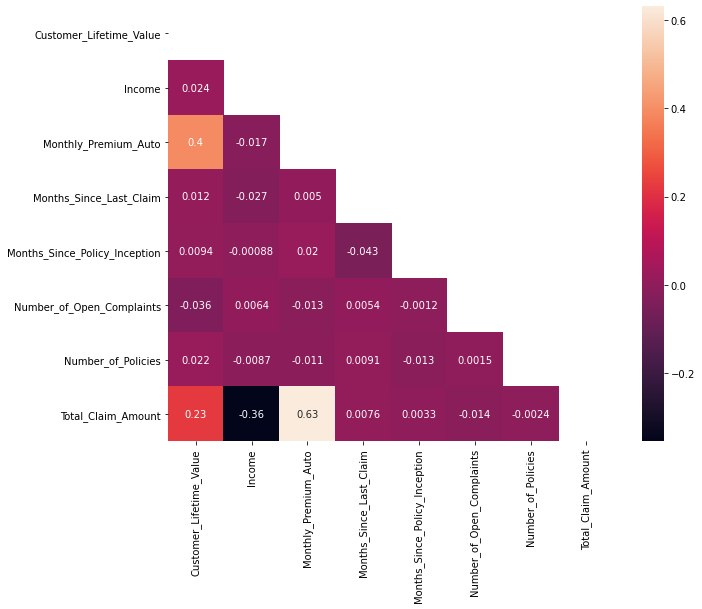

In [35]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [36]:
#num_wa_0 = ['Customer Lifetime Value','Monthly Premium Auto','Number Of Policies',]

In [37]:
target = data['Total_Claim_Amount']

In [38]:
data = data.drop(['Total_Claim_Amount','Effective_To_Date'], axis=1)

In [39]:
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)

In [40]:
num.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
Customer,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1
QZ44356,6979.535903,0,94,13,42,0,8
AI49188,12887.431650,48767,108,18,38,0,2
WW63253,7645.861827,0,106,18,65,0,7
HB64268,2813.692575,43836,73,12,44,0,1


In [41]:
from sklearn.preprocessing import Normalizer

In [42]:
transformer = Normalizer().fit(num)
x_normalized = pd.DataFrame(transformer.transform(num))
print(x_normalized.shape)

(8971, 7)


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

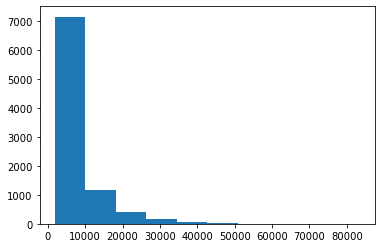

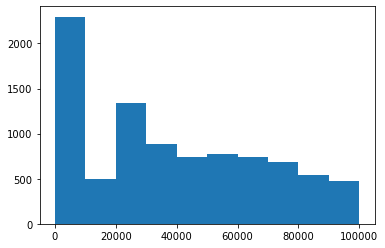

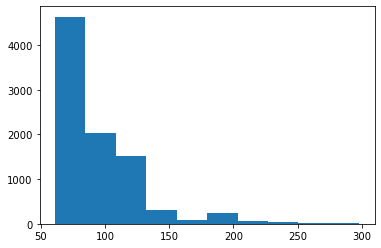

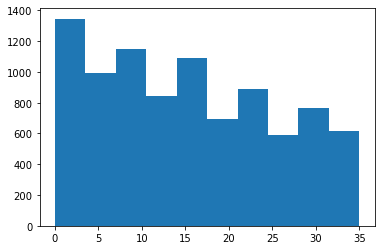

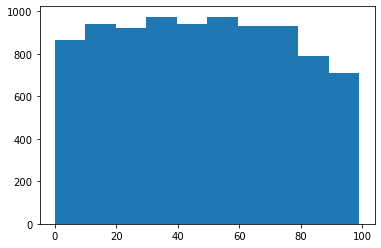

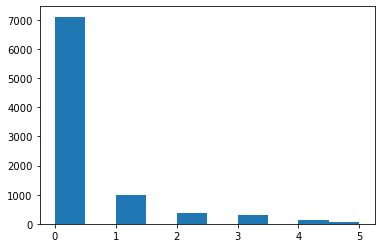

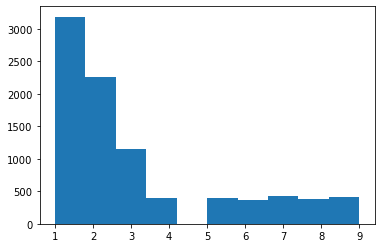

In [44]:
for x in num.columns:
    plt.hist(num[x], bins=10)
    plt.show()

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat) 


encoded = pd.DataFrame(encoder.transform(cat).toarray())
encoded


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8968,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8969,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
cat.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Employment_Status',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [48]:
num.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies'],
      dtype='object')

In [49]:
x_normalized.columns = num.columns
x_normalized.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies'],
      dtype='object')

In [50]:
combined=pd.concat([x_normalized,encoded],axis=1)

In [51]:
combined.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(combined, target, test_size=0.4, random_state=100)

In [53]:
lm = linear_model.LinearRegression()

# We "train" our linear model based on the data available on X_train and y_train
model = lm.fit(X_train,y_train)

In [54]:
predictions  = lm.predict(X_test)

In [55]:
print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),2))

The R2 of the linear model is:  0.77


In [56]:
mse = mean_squared_error(y_test, predictions)
print(mse)

18852.538980928246


In [57]:
rmse = math.sqrt(mse)
print(rmse)

137.30454828929828


In [58]:
r2 = r2_score(y_test, predictions)
print("The R2 value on the TEST set is: ",round(r2,2))

The R2 value on the TEST set is:  0.77


In [59]:
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The R_adj^{2} value on the TEST set is: ",round(adj_r2,2))

The R_adj^{2} value on the TEST set is:  0.76
